## Odds and Ends: File Reading and Matplotlib

Now that we're familiar with the essentials of the Python language we're going to practice [reading files](https://www.pythonlikeyoumeanit.com/Module5_OddsAndEnds/WorkingWithFiles.html) and [plotting with Matplotlib](https://www.pythonlikeyoumeanit.com/Module5_OddsAndEnds/Matplotlib.html). 

Although these topics may be considered "odds and ends", they are common in many day-to-day applications. You'll find that spending some time up front to become familiar with these materials will save a lot of time down the road.

## Problem 1: Reading and Parsing Files
Let's pretend we were conducting a survey of favorite foods. Each participant is asked to list their favorite foods along with its category (e.g. dessert, snack, fruit). The food and category are separated by a colon, and each food-category pair is separated by a comma like so

```food: category, food: category, food: category, ... ```

The results of this survey are stored in a text file, `results.txt`, giving us a great opportunity to practice our file reading skills!

Our task is to write a function called `get_most_popular_foods` that takes a file path of survey results and returns the most common response for each food category in the form of a dictionary where the keys are the food categories and the values are the most common food of that type. If there is a tie, return the food that comes first alphabetically. Note, we don't know which food categories will be given before reading the file.

So, if we had data in the file `example.txt` with the contents below

``` granola bars: snack, shrimp: seafood
granola bars: snack
tuna: seafood ```

Our function would produce the following result
 ``` python
 >>> get_most_popular_foods('example.txt')
  {'snack': 'granola bars', 'seafood': ' shrimp'}
 ```
 
 The `collections.Counter` object will be useful for this problem. Also, the function `itertools.chain` may come in handy.
 
For reference, there is a short example input under `resources/example-survey.txt`. On this input, your function should produce the response as follows
 ``` python
>>> get_most_popular_foods('resources/example-survey.txt')
 {'dessert': 'cake', 'vegetable': 'carrots', 'fruit': 'peaches'}
```

In [227]:
from pathlib import Path
from collections import Counter
from collections import OrderedDict

root = Path(".") 
def get_most_popular_foods(file_path):
    """ Read in survey and determine the most common food of each type.
    
    Parameters
    ----------
    file_path : str
        Path to text file containing favorite food survey responses.
        
    Returns
    -------
    Dict[str, str]
        Dictionary with the key being food type and value being food.
    """
    pathToFile = root / file_path      
    with pathToFile.open(mode='r') as openFile:
        entry = [(line if (', ' not in line) else line.split(', ')) for line in openFile]
    
    normalList = [] #holds all entries separated into a list
    for line in entry:
        if(type(line) == list):
            normalList = normalList + line
        else:
            normalList.append(line)

    formatted = [] #removes spaces and the \n
    for element in normalList:
        removed = element.replace('\n','')
        #removed = removed.replace(' ','')
        formatted.append(removed)
    

    
 
    categories = []
    foods = []
    for element in formatted:
        food, category  = element.split(': ')
        categories.append(category)
        foods.append(food)
    togetherList = list(zip(categories, foods))
    #uniqueCategories = set(categories) #problem? TODO
    uniqueCategories = OrderedDict.fromkeys(categories)
    blankLists = [[] for _ in range(len(uniqueCategories))]
    dictSorted = OrderedDict(zip(uniqueCategories,blankLists))#used for sorting foods into list values for category key

    
    for [category, food] in togetherList: #sorts foods into their category
        dictSorted[category].append(food)

    dictSortedAlphabet = dictSorted.copy() #none of that same memory bs
    for key in dictSortedAlphabet:
        dictSortedAlphabet[key] = sorted(dictSorted[key])
    
    finalDict = dict.fromkeys(uniqueCategories) #problem?
    
    for category in finalDict:
        food, count = Counter(dictSortedAlphabet[category]).most_common(1)[0]
        finalDict[category] = food
    
    #return dictSorted
    #return togetherList
    return finalDict
    #pass

In [228]:
get_most_popular_foods("./resources/example-survey.txt")

{'dessert': 'cake', 'vegetable': 'carrots', 'fruit': 'peaches'}

In [229]:
from bwsi_grader.python.odds_and_ends import grade_file_parser
grade_file_parser(get_most_popular_foods)


============================== ALL TESTS PASSED! ===============================
Your submission code: bwb8b7694e6fad3035e4331f2d41fa9477ec007cc11e40a8338b9390b5



## Problem 2: Plotting an Image with Matplotlib

We have an image in the file `resources/mystery-img.npy`. Read and plot the image, then answer the following for Question 2 of the homework:

__What is in this image?__

In [231]:
import matplotlib.pyplot as plt

In [232]:
import numpy as np

In [236]:
%matplotlib notebook

In [233]:
x=np.linspace(-np.pi, np.pi, 50)
y=np.sin(x)

<IPython.core.display.Javascript object>


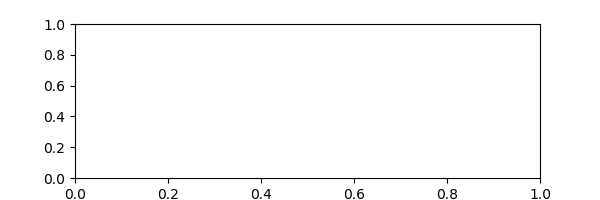

In [263]:
f, (ax1, ax2) = plt.subplots(1,2,figsize=(6,2))
x=np.linspace(0, 5, 100)
ax1.plot(x,np.e ** (-x), label = "a")
x=np.linspace(0, 5, 10)
ax1.plot(x,x**2, color = 'blue', label = "b")
ax2.plot(x,x**2, color = 'green')

<IPython.core.display.Javascript object>


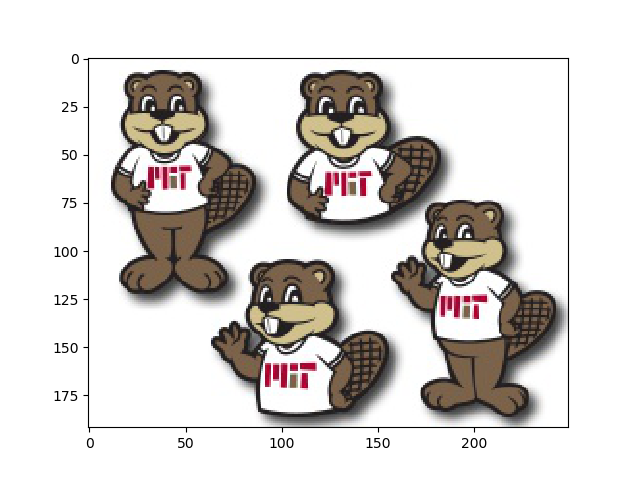

In [287]:
from pathlib import Path
root = Path('.')
pathToFile = root  / 'resources' / 'mystery-img.npy'
matrix = np.load(pathToFile)
#matrix = np.triu(np.random.rand(10, 10))
#np.save(pathToFile,matrix)
f,ax = plt.subplots()
ax.imshow(matrix)

<IPython.core.display.Javascript object>


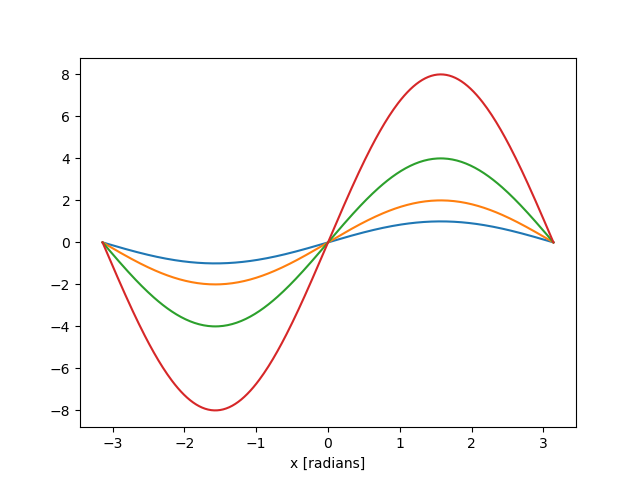

In [273]:
f,ax = plt.subplots()
x=np.linspace(-np.pi,np.pi,300)
ax.plot(x,np.sin(x))
ax.plot(x,2*np.sin(x))
ax.plot(x,4*np.sin(x))
ax.plot(x,8*np.sin(x))
ax.set_xlabel("x [radians]")

f.savefig("sine_waves.png")